<a href="https://colab.research.google.com/github/NithinNarayanan07/Machine-Learning/blob/main/ml_case_study_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Machine Learning/Movies1.csv')
df

,Unnamed: 0,userId,movieId,title,genres,review,rating
0,0,1.0,1.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,One of the other reviewers has mentioned that ...,9.2
1,1,1.0,2.0,Jumanji (1995),Adventure|Children|Fantasy,A wonderful little production.The filming tech...,8.9
2,2,1.0,3.0,Grumpier Old Men (1995),Comedy|Romance,NaN,8.4
3,3,1.0,4.0,Waiting to Exhale (1995),Comedy|Drama|Romance,Basically there's a family where a little boy ...,5.4
4,4,1.0,5.0,Father of the Bride Part II (1995),Comedy,"Petter Mattei's ""Love in the Time of Money"" is...",8.2
...,...,...,...,...,...,...,...
50008,50008,302.0,120729.0,Mexican Spitfire's Elephant (1942),Comedy|Romance,The story line is taken in a good manner,10.0
50009,50009,186.0,120731.0,Revolt of the Slaves (1960),Adventure,It is very exciting and is such a wonderfull m...,9.0
50010,50010,18.0,120733.0,Mexican Spitfire Sees a Ghost (1942),Comedy,the end credits are so good that I busted out ...,9.2
50011,50011,24.0,120735.0,Love Chronicles (2003),Drama|Romance,itÆs a well developed storyline without any lag,9.5


# ***Imputation***

In [ ]:
df.dtypes                  # data type of each column

Unnamed: 0      int64
userId        float64
movieId       float64
title          object
genres         object
review         object
rating        float64
dtype: object

In [ ]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)  # dropped column named unknown

In [ ]:
df.isnull().sum()

userId        1
movieId       1
title         1
genres     3759
review      103
rating        0
dtype: int64

In [ ]:
df.drop(50012,axis=0,inplace=True)  # dropped last row

In [ ]:
df

,userId,movieId,title,genres,review,rating
0,1.0,1.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,One of the other reviewers has mentioned that ...,9.2
1,1.0,2.0,Jumanji (1995),Adventure|Children|Fantasy,A wonderful little production.The filming tech...,8.9
2,1.0,3.0,Grumpier Old Men (1995),Comedy|Romance,NaN,8.4
3,1.0,4.0,Waiting to Exhale (1995),Comedy|Drama|Romance,Basically there's a family where a little boy ...,5.4
4,1.0,5.0,Father of the Bride Part II (1995),Comedy,"Petter Mattei's ""Love in the Time of Money"" is...",8.2
...,...,...,...,...,...,...
50007,397.0,120641.0,Santa Fe (1951),Action|Romance|Western,it isnt good and I am very disappoined,6.1
50008,302.0,120729.0,Mexican Spitfire's Elephant (1942),Comedy|Romance,The story line is taken in a good manner,10.0
50009,186.0,120731.0,Revolt of the Slaves (1960),Adventure,It is very exciting and is such a wonderfull m...,9.0
50010,18.0,120733.0,Mexican Spitfire Sees a Ghost (1942),Comedy,the end credits are so good that I busted out ...,9.2


In [ ]:
df.isnull().sum() # count of null value in each column

userId        0
movieId       0
title         0
genres     3758
review      103
rating        0
dtype: int64

In [ ]:
df.dtypes

userId     float64
movieId    float64
title       object
genres      object
review      object
rating     float64
dtype: object

In [ ]:
df['userId']=df['userId'].astype(int)     # changing datatype to int from float

In [ ]:
df['movieId']=df['movieId'].astype(int)   # changing datatype to int from float

In [ ]:
df

,userId,movieId,title,genres,review,rating
0,1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,One of the other reviewers has mentioned that ...,9.2
1,1,2,Jumanji (1995),Adventure|Children|Fantasy,A wonderful little production.The filming tech...,8.9
2,1,3,Grumpier Old Men (1995),Comedy|Romance,NaN,8.4
3,1,4,Waiting to Exhale (1995),Comedy|Drama|Romance,Basically there's a family where a little boy ...,5.4
4,1,5,Father of the Bride Part II (1995),Comedy,"Petter Mattei's ""Love in the Time of Money"" is...",8.2
...,...,...,...,...,...,...
50007,397,120641,Santa Fe (1951),Action|Romance|Western,it isnt good and I am very disappoined,6.1
50008,302,120729,Mexican Spitfire's Elephant (1942),Comedy|Romance,The story line is taken in a good manner,10.0
50009,186,120731,Revolt of the Slaves (1960),Adventure,It is very exciting and is such a wonderfull m...,9.0
50010,18,120733,Mexican Spitfire Sees a Ghost (1942),Comedy,the end credits are so good that I busted out ...,9.2


In [ ]:
df.loc[df['genres'].isnull()==True,'movieId'] # checking null values in column genres

15881     83773
16060     84768
16351     86493
16491     87061
17404     91246
          ...  
49968    179995
49972    180003
49973    180005
49993    180049
49995    180053
Name: movieId, Length: 3758, dtype: int64

In [ ]:
df['genres'].fillna('All',inplace=True)     # filling nan values

In [ ]:
df['review'].fillna('Good',inplace=True)    # filling nan values

In [ ]:
df.isnull().sum()       # final count of null values

userId     0
movieId    0
title      0
genres     0
review     0
rating     0
dtype: int64

## ***Preprocessing***

In [ ]:
df.describe()         # dataframe description excluding categorical data

,userId,movieId,rating
count,50012.000000,50012.000000,50012.000000
mean,195.318943,104437.677777,6.627409
std,116.375446,58237.662083,2.794826
min,1.000000,1.000000,1.000000
25%,92.000000,60467.500000,4.300000
50%,187.000000,122759.000000,7.500000
75%,294.000000,152784.000000,9.000000
max,406.000000,180061.000000,10.000000


In [ ]:
df2=df[['movieId','title','review','rating']]      # creating new dataframe by copying column values

In [ ]:
df2

,movieId,title,review,rating
0,1,Toy Story (1995),One of the other reviewers has mentioned that ...,9.2
1,2,Jumanji (1995),A wonderful little production.The filming tech...,8.9
2,3,Grumpier Old Men (1995),Good,8.4
3,4,Waiting to Exhale (1995),Basically there's a family where a little boy ...,5.4
4,5,Father of the Bride Part II (1995),"Petter Mattei's ""Love in the Time of Money"" is...",8.2
...,...,...,...,...
50007,120641,Santa Fe (1951),it isnt good and I am very disappoined,6.1
50008,120729,Mexican Spitfire's Elephant (1942),The story line is taken in a good manner,10.0
50009,120731,Revolt of the Slaves (1960),It is very exciting and is such a wonderfull m...,9.0
50010,120733,Mexican Spitfire Sees a Ghost (1942),the end credits are so good that I busted out ...,9.2


**Creating** a new column called sentiment based on ratings

In [ ]:
for i in range(len(df2)):
  if df2.iloc[i]['rating']>=8.0:
    df2.at[i,'sentiment']="POSITIVE"
  else:
    df2.at[i,'sentiment']="NEGATIVE"

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [ ]:
df2 # after creating new column 

,movieId,title,review,rating,sentiment
0,1,Toy Story (1995),One of the other reviewers has mentioned that ...,9.2,POSITIVE
1,2,Jumanji (1995),A wonderful little production.The filming tech...,8.9,POSITIVE
2,3,Grumpier Old Men (1995),Good,8.4,POSITIVE
3,4,Waiting to Exhale (1995),Basically there's a family where a little boy ...,5.4,NEGATIVE
4,5,Father of the Bride Part II (1995),"Petter Mattei's ""Love in the Time of Money"" is...",8.2,POSITIVE
...,...,...,...,...,...
50007,120641,Santa Fe (1951),it isnt good and I am very disappoined,6.1,NEGATIVE
50008,120729,Mexican Spitfire's Elephant (1942),The story line is taken in a good manner,10.0,POSITIVE
50009,120731,Revolt of the Slaves (1960),It is very exciting and is such a wonderfull m...,9.0,POSITIVE
50010,120733,Mexican Spitfire Sees a Ghost (1942),the end credits are so good that I busted out ...,9.2,POSITIVE


In [ ]:
lb_make = LabelEncoder()              # label encoding the categorical data sentiment
df2['sent_code'] = lb_make.fit_transform(df2['sentiment'])

In [ ]:
df2.head(10)            #final dataframe after preprocessing

,movieId,title,review,rating,sentiment,sent_code
0,1,Toy Story (1995),One of the other reviewers has mentioned that ...,9.2,POSITIVE,1
1,2,Jumanji (1995),A wonderful little production.The filming tech...,8.9,POSITIVE,1
2,3,Grumpier Old Men (1995),Good,8.4,POSITIVE,1
3,4,Waiting to Exhale (1995),Basically there's a family where a little boy ...,5.4,NEGATIVE,0
4,5,Father of the Bride Part II (1995),"Petter Mattei's ""Love in the Time of Money"" is...",8.2,POSITIVE,1
5,6,Heat (1995),"Probably my all-time favorite movie, a story o...",8.0,POSITIVE,1
6,7,Sabrina (1995),I sure would like to see a resurrection of a u...,9.2,POSITIVE,1
7,8,Tom and Huck (1995),"This show was an amazing, fresh & innovative i...",6.4,NEGATIVE,0
8,9,Sudden Death (1995),Encouraged by the positive comments about this...,1.5,NEGATIVE,0
9,10,GoldenEye (1995),If you like original gut wrenching laughter yo...,8.1,POSITIVE,1


In [ ]:
df2.dtypes

movieId        int64
title         object
review        object
rating       float64
sentiment     object
sent_code      int64
dtype: object

In [ ]:
df2['title']=df2['title'].astype(str)

In [ ]:
df.dtypes

userId       int64
movieId      int64
title       object
genres      object
review      object
rating     float64
dtype: object

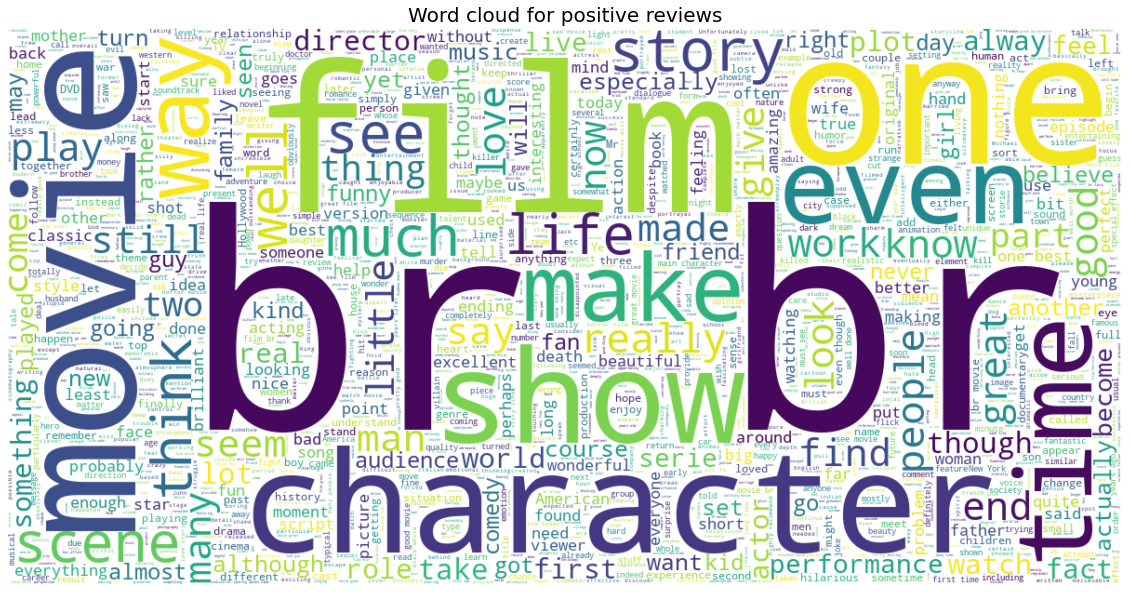

In [ ]:
#word cloud for positive reviews
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

positive_data = df2[df2.sent_code == 1]['review']
positive_data_string = ' '.join(positive_data)
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 2000, width=1200, height=600,background_color="white").generate(positive_data_string)
plt.imshow(wc , interpolation = 'bilinear')
plt.axis('off')
plt.title('Word cloud for positive reviews',fontsize = 20)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
train, test= train_test_split(df2, test_size=0.2, random_state=42)
Xtrain, ytrain = train['review'], train['sent_code']
Xtest, ytest = test['review'], test['sent_code']

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vect = TfidfVectorizer() #tfidfVectorizer

Xtrain_tfidf = tfidf_vect.fit_transform(Xtrain)
Xtest_tfidf = tfidf_vect.transform(Xtest)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Logistic Regression Accuracy : 90.28%


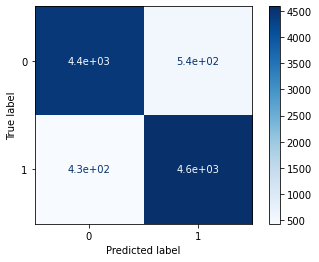

In [ ]:
from sklearn.metrics import  accuracy_score,  plot_confusion_matrix

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(Xtrain_tfidf,ytrain)
p1=lr.predict(Xtest_tfidf)
s1=accuracy_score(ytest,p1)
print("Logistic Regression Accuracy :", "{:.2f}%".format(100*s1))
plot_confusion_matrix(lr, Xtest_tfidf, ytest,cmap = 'Blues')
plt.grid(False)
